In [48]:
import tensorflow.keras as keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from RWNN import PseudoRWNN
from RWNN import EnsemblePsudoRWNN
plt.rcParams['figure.figsize'] = [15, 15]

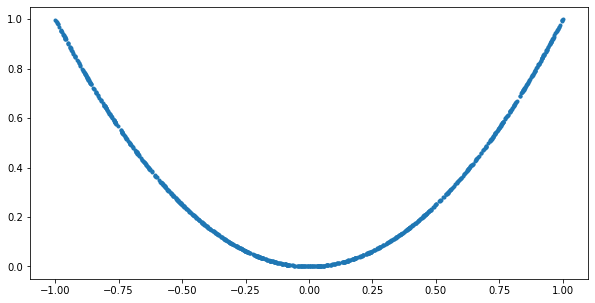

In [41]:
#1D
#simple 1d input -> 1d output training set (easy visualization)
seed=0
rng=np.random.RandomState(seed)
x=2*rng.rand(1000,1)-1
y=(x)**2
plt.plot(x,y,'.',)

In [60]:
# Build a 3 layer Pseudo RWNN and train it 
layers=[
    (40,'tanh',0.5,True),
    (10,'tanh',0.5,True),
    (1,'linear',1,False) # 1d output 
]

ens = EnsemblePsudoRWNN.EnsemblePsudoRWNN(30,1,layers,seed=42)
ens.train(x,y,batch_size=8,epochs=100,learning_rate=0.2,perToTrain=0.8)

0 0.00020061250716025826
1 0.00047314896717580267
2 0.0002948067805118626
3 0.00014166192127049727
4 1.0632500429892389e-05
5 7.011572293777135e-05
6 1.7990098259588195e-05
7 0.00011930412897527276
8 0.0001750760100185289
9 0.00012073776504621492
10 0.0003286694890266517
11 3.487687749384349e-05
12 0.0003480397238854493
13 0.0003848126691082143
14 0.00014205700584170699
15 0.0004228968883762718
16 0.00014918979836693326
17 0.000269563920883229
18 0.00034258971569215644
19 0.0003346700848123874
20 0.000269522266171407
21 0.00022074328750022688
22 0.00011651551889372059
23 2.239040583390306e-05
24 1.300117240475629e-05
25 5.535772659186478e-05
26 0.00025377683967235497
27 2.5742741522662983e-05
28 3.157791721150716e-05
29 0.0002902411988543463


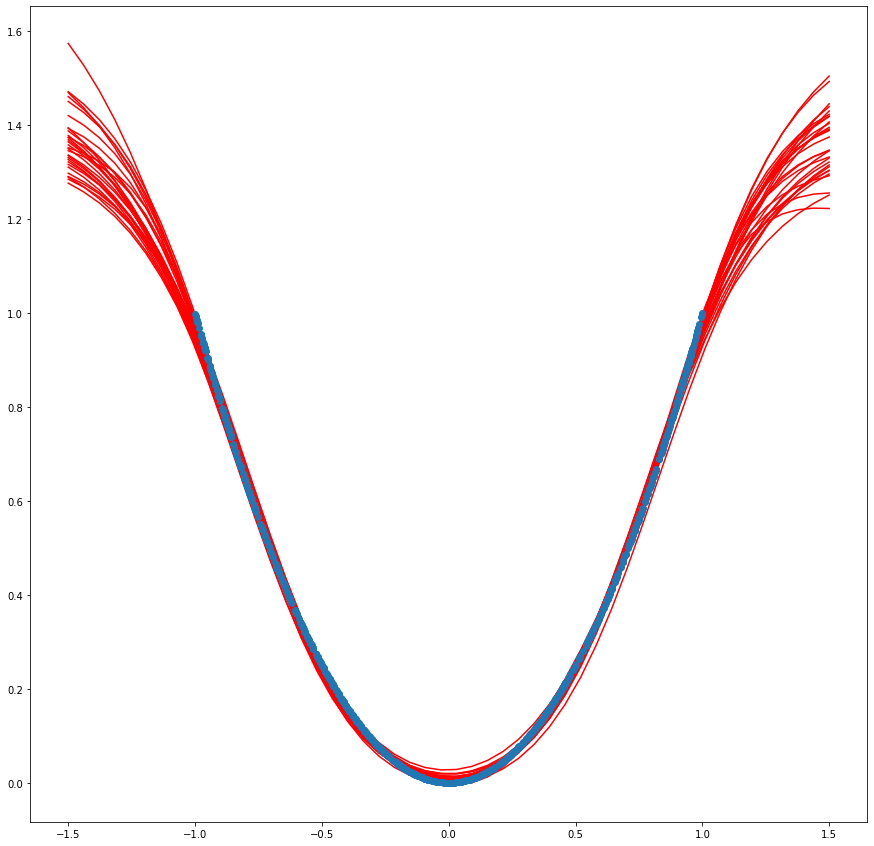

In [61]:
xx=np.linspace(-1.5, 1.5, num=50)
yy=ens.use(xx)

for yi in yy:
    plt.plot(xx,yi,c='r')
    
plt.plot(x,y,'o')

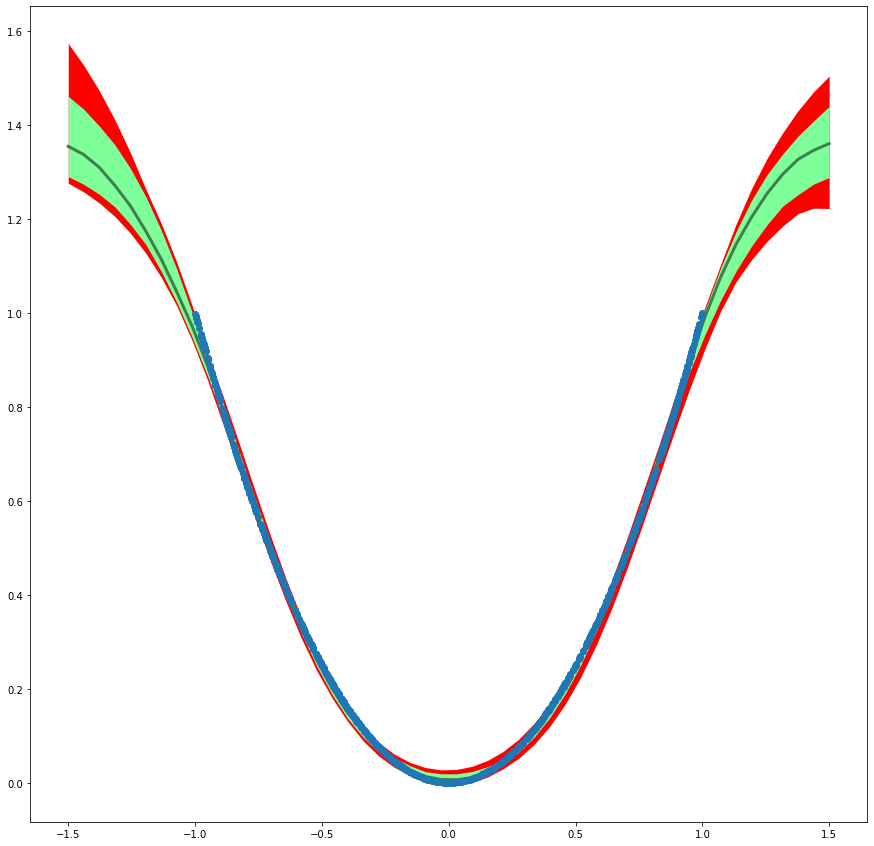

In [62]:
#Visualizing
ymin=[]
y10=[]
y90=[]
ymax=[]
ymean=[]
for yi in np.transpose(yy)[0]:
    y10.append(np.percentile(yi, 10))
    y90.append(np.percentile(yi, 90))
    ymean.append(np.percentile(yi, 50))
    ymin.append(np.min(yi))
    ymax.append(np.max(yi))
    

plt.plot(xx, ymean, 'k', color='#3F7F4C',linewidth=3)
plt.fill_between(xx, ymin, ymax,
    alpha=1, edgecolor='#3F7F4C', facecolor='red',
    linewidth=0)
plt.fill_between(xx, y10, y90,
    alpha=1, edgecolor='#3F7F4C', facecolor='#7EFF99',
    linewidth=0)

plt.plot(x,y,'o')
    